<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/4_support_vector_machines_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*Este caderno foi criado por [Adrielson Ferreira Justino](https://twitter.com/jeande_d). Para qualquer feedback, erro ou sugestão, ele pode ser contatado por e-mail (adrielferreira28@gmail.com), [GIT](https://) ou [LinkedIn](https://linkedin.com/ em/).*

# Support Vector Machines (SVM)

### O que é SVM?

**Máquinas de vetores de suporte** são o tipo de algoritmo de aprendizado supervisionado usado para **regressão, classificação e detecção de outliers**;


SVMs são notavelmente um dos modelos poderosos no aprendizado de máquina clássico;


São adequados para lidar com conjuntos de dados complexos e de alta dimensão;

### Quais tipos de dados?
O SVM pode lidar com diferentes tipos de conjuntos de dados, tanto **lineares quanto não lineares**;


Isso é possível pois o SVM **suporta diferentes kernels** (linear, polinomial, Radial Basis Function (rbf) e sigmóide), 

### *Embora a matemática por trás dos SVMs esteja além do escopo desta apresentação, aqui está a ideia por trás dos SVMs:*

<!-- *A forma como o SVM funciona pode ser comparada a uma rua com uma linha divisória. Durante o treinamento SVM, o SMV traça uma grande margem ou limite de decisão entre as classes com base na importância de cada ponto de dados de treinamento. Os pontos de dados de treinamento que estão dentro do limite de decisão são chamados de vetores de suporte e daí o nome.*

![SVM](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1200px-Kernel_Machine.svg.png)

Fonte da imagem: Wikimedia -->

Primeiro vamos supor que temos um conjunto de pontos como do gráfico abaixo.

<img src="img/pontos1.png" alt="Exemplo de Imagem" width = "500">

<!-- palette = sns.color_palette()

x_orange = [0.00, 0.4, 0.08, 0.2, 0.26, 0.3, 0.4, 0.5, 0.6, 0.7, 0.76]
x_blue = [1.19, 1.27, 1.35, 1.45, 1.50, 1.57, 1.66, 1.7, 1.75, 1.8, 1.9, 2]
y_orange = [0]*len(x_orange)
y_blue = [0]*len(x_blue)

# Criando o gráfico
plt.figure(figsize=(10, 2))
plt.plot(x_orange + x_blue, y_orange + y_blue, color='black')
plt.scatter(x_orange, y_orange, color=palette[1], label='Laranja', zorder=5)
plt.scatter(x_blue, y_blue, color=palette[0], label='Azul', zorder=5)
plt.xlabel('Eixo X')
plt.yticks([])  # Remove o eixo Y
plt.legend()
plt.grid(True)
plt.show() -->

No gráfico abaixo entre os pontos roxos e amarelos temos um ponto vermelho. 

<img src="img/pontos2.png" alt="Exemplo de Imagem" width = "500">

<!-- palette = sns.color_palette()

x_orange = [0.00, 0.4, 0.08, 0.2, 0.26, 0.3, 0.4, 0.5, 0.6, 0.7, 0.76]
x_blue = [1.19, 1.27, 1.35, 1.45, 1.50, 1.57, 1.66, 1.7, 1.75, 1.8, 1.9, 2]
y_orange = [0]*len(x_orange)
y_blue = [0]*len(x_blue)
x_red = [0.88]
y_red = [0]

plt.figure(figsize=(10, 2))
plt.plot(x_orange + x_blue + x_red, y_orange + y_blue + y_red, color='black')
plt.scatter(x_orange, y_orange, color=palette[1], label='Laranja', zorder=5)
plt.scatter(x_blue, y_blue, color=palette[0], label='Azul', zorder=5)
plt.scatter(x_red, y_red, color='red', zorder=5) #label='Vermelho'
plt.xlabel('Eixo X')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show() -->

### *Qual seria a classificação deste ponto? Laranja ou azul?*

<img src="img/pontos3.png" alt="Exemplo de Imagem" width = "500">

<!-- palette = sns.color_palette()
x_orange = [0.00, 0.4, 0.08, 0.2, 0.26, 0.3, 0.4, 0.5, 0.6, 0.7, 0.76, 0.88]  
x_blue = [1.19, 1.27, 1.35, 1.45, 1.50, 1.57, 1.66, 1.7, 1.75, 1.8, 1.9, 2] 
y_orange = [0]*len(x_orange)
y_blue = [0]*len(x_blue)

plt.figure(figsize=(10, 2))
plt.plot(x_orange + x_blue, y_orange + y_blue, color='black')
plt.scatter(x_orange, y_orange, color=palette[1], label='Laranja', zorder=5)
plt.scatter(x_blue, y_blue, color=palette[0], label='Azul', zorder=5)
# plt.title('Gráfico com Pontos e Linha de Decisão')
plt.xlabel('Eixo X')
plt.yticks([])  # Remove o eixo Y
plt.legend()
plt.grid(True)
plt.show() -->

Intuitivamente, pela proximidade do ponto vermelho com os pontos laranjas é muito provável a classificação desse ponto é **laranja**.

### *Essa lógica é muito parecida com a utilizada no SVM.*

Podemos basicamente pegar os pontos que estão mais no extremo dos dados (**os pontos de duas classes diferentes que estão mais próximos entre si**) e usar esses pontos para determinar um <font color='blue'>**hiperplano**</font> capaz de separar essas classes.

<!-- **Quanto maior a margem, melhor!** -->

### *A pergunta que queremos responder é:*

Qual seria o melhor lugar entre os pontos para colocar o nosso <font color='blue'>**limite de separação**</font>?

<img src="img/limite_de.png" alt="Exemplo de Imagem" width = "500">

<!-- palette = sns.color_palette()
x_orange = [0.00, 0.4, 0.08, 0.2, 0.26, 0.3, 0.4, 0.5, 0.6, 0.7, 0.76]  
x_blue = [1.19, 1.27, 1.35, 1.45, 1.50, 1.57, 1.66, 1.7, 1.75, 1.8, 1.9, 2] 
y_orange = [0]*len(x_orange)
y_blue = [0]*len(x_blue)

plt.figure(figsize=(10, 2.2))
plt.plot(x_orange + x_blue, y_orange + y_blue, color='black')
plt.scatter(x_orange, y_orange, color=palette[1], label='Laranja', zorder=5)
plt.scatter(x_blue, y_blue, color=palette[0], label='Azul', zorder=5)
# Linha de decisão
plt.axvline(x=0.975, color='black', linestyle='--', label='Linha de Decisão')
# plt.title('Gráfico com Pontos e Linha de Decisão')
plt.xlabel('Eixo X')
plt.yticks([])  # Remove o eixo Y
plt.legend()
plt.grid(True)
plt.show() -->

Este lugar irá indicar que se o meu ponto for menor do que o valor do limite de decisão então ele vai ser classificado como laranja e se for maior vai ser classificado como azul.

Nesta escala nós conseguimos perceber visualmente que talvez este local ou ponto seja o 0,975.

### *Conceitualmente o que tem por trás disso que estamos fazendo?*

O que o algoritmo vai fazer é pegar os pontos que estão mais extremos, ou seja, os pontos que pertencem a classes diferentes e que tenham a **menor distância** entre eles:

<img src="img/menor_di.png" alt="Exemplo de Imagem" width = "500">

A estes pontos damos o nome de <font color='blue'>**vetores de suporte**</font>

<img src="img/vetores_su.png" alt="Exemplo de Imagem" width = "500">

Os vetores de suporte servem para traçarmos as <font color='blue'>**margens**</font> 

<img src="img/margens.png" alt="Exemplo de Imagem" width = "500">

As margens vão definir qual será o nosso <font color='blue'>**hiperplano de separação.**</font>

Quanto maior a margem, melhor!

<img src="img/hiper.png" alt="Exemplo de Imagem" width = "500">

O conceito do Support Vector Machine é basicamente esse.

Pegamos os pontos de classes diferentes que estão mais próximos entre si e a partir deles definimos as margens.

Todo mundo que está para trás dessa margem é laranja.

Todo mundo que está para frente dessa margem é azul.

### Dados não lineares

Um fato importante é que ele **pode ser utilizado tanto em dados linearmente separáveis** (como mostrado acima) **como em dados que não são linearmente separáveis** (que são a maioria dos nossos dados) 

<img src="img/n_lin.png" alt="Exemplo de Imagem" width = "400">

- Quando nós falamos linearmente separados não estamos falando somente de uma <font color='blue'>**reta**</font>.

- Podemos estar falando de uma <font color='blue'>**reta**</font> quando temos <font color='blue'>**duas dimensões**</font>.

- Falando de um <font color='blue'>**plano**</font> quando temos <font color='blue'>**três dimensões**</font>.

- <font color='blue'>**Hiperplanos**</font> quando temos <font color='blue'>**mais de três dimensões**</font> em que não temos uma capacidade de visualização muito clara.

Isso é feito no algoritmo elevando as dimensões dos dados.

<img src="img/n_lin_3d.png" alt="Exemplo de Imagem" width = "400">

O SVM vai usar as funções de kernel e no próprio algoritmo ele vai buscar a melhor dimensão capaz de encontrar essa separação.

Só que ele não faz efetivamente essas transformações, apenas vai calcular a relação entre os pontos considerando que eles estão nessas dimensões. 

##### Isso é chamado de **"Truque do Kernel"**

### Contents

* [1 - Imports](#1)
* [2 - Carregando os dados](#2)
* [3 - Análise Exploratória](#3)
* [4 - Pré-processamento](#4)
* [5 - Classificador SVM](#5)
* [6 - Avaliando o classificador SVM](#6)
* [7 - Funções do kernel](#7)
* [8 - Melhorando o classificador SVM](#8)

<a name='1'></a>
## 1 - Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## 2 - Carregando os dados

Vamos usar o conjunto de dados de *Breast Cancer* disponível no **Scikit-Learn**. 

Este conjunto de dados é amplamente utilizado para problemas de classificação binária.

Contém informações de características extraídas de imagens digitalizadas de massas mamárias. 

O objetivo é classificar as massas como malignas ou benignas com base nas características fornecidas.

In [ ]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [ ]:
# cancer = datasets.load_breast_cancer()
# X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# y = pd.Series(cancer.target, name='target')

## 3 - Análise Exploratória

In [ ]:
X.head()

In [ ]:
X.info()

### *Exibindo histograma das características*

In [ ]:
X.hist(bins=30, figsize=(20,15))
plt.show()

### *Traçando os gráficos de dispersão das caracteríticas*

In [ ]:
# Criar uma cópia do DataFrame X para adicionar a coluna 'target'
X_copy = X.copy()
X_copy['target'] = y

palette = sns.color_palette()[:2]
num_features = X.shape[1]  # Número de características
num_cols = 3  # Número de colunas para os subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calcular o número de linhas necessário

plt.figure(figsize=(15, 50))

# Laço para criar os gráficos de dispersão
for i, feature in enumerate(X.columns):  # Iterar por todas as colunas de X
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(x=X_copy['mean radius'], y=X_copy[feature], hue=X_copy['target'], palette=palette)
    plt.xlabel('mean radius')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### *Exibindo a contagem dos valores da coluna alvo (Target)*

In [ ]:
palette = sns.color_palette()
value_counts = y.value_counts()
plt.figure(figsize=(8, 4))

colors = [palette[1],palette[0]]  # Cores diferentes para as classes
value_counts.plot(kind='bar', color=colors)
plt.title('Contagem dos Valores Alvo (Target)')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Maligno', 'Benigno'], rotation=0)
plt.show()

In [ ]:
y.value_counts()

### *Separar conjunto de dados de treino e teste*
Antes de explorar alguns insights sobre os dados, vamos dividi-los em conjunto de teste e conjunto de treinamento.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=20)

print('O tamanho dos dados de treinamento é: {} \nO tamanho dos dados de teste é: {}'.format(len(X_train), len(X_test)))

In [ ]:
y_test.value_counts()

## 4 - Pré-processamento

<!-- The features already have small values but let's scale them to be between 0 and 1. SVM work well with scaled values. I will set up a pipeline to handle that. -->

O SVM funciona bem com valores escalonados. Aqui é feita a configuração para escalar esses valores para ficarem entre 0 e 1. 

In [ ]:
X_train.max()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scale_pipe = Pipeline([
    ('scaler', MinMaxScaler())
])

X_train_scaled = scale_pipe.fit_transform(X_train)
X_test_scaled = scale_pipe.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

## 5 - Classificador SVM

### Parâmetros do SVM no Scikit-learn

O Scikit-learn fornece várias opções para configurar o SVM. Alguns dos principais parâmetros são:

- **`kernel`: Especifica o tipo de kernel a ser usado na função de decisão.** SVM suporta kernels `linear`, `polinomial`, `rbf`, `sigmoid`,`precomputed` ou um `callable`.

- **`C`: Parâmetro de regularização.** Quanto maior o valor de `C`, menor a margem de erro, mas pode levar ao overfitting.

- **`gamma`: Coeficiente do kernel para 'rbf', 'poly' e 'sigmoid'.** Se `gamma` for 'scale', `gamma` será 1 / (n_features * X.var()), se for 'auto', `gamma` será 1 / n_features.


- **`degree`: Grau do polinômio se o kernel for 'poly'.** Ignorado por outros kernels.

- **`coef0`: Término independente no kernel 'poly' e 'sigmoid'.**


- **`shrinking`: Se deve usar heurísticas de encolhimento.**


- **`probability`: Se deve habilitar estimativas de probabilidade.** Isso é mais demorado e deve ser ativado antes de ajustar o modelo.

- **`tol`: Critério de tolerância para parada.**

- **`cache_size`: Tamanho do cache em MB.**

- **`class_weight`: Peso associado às classes.**

- **`verbose`: Habilitar saída detalhada.**

- **`max_iter`: Número máximo de iterações.**

### Treinamento do Classificador SVM 
Aqui é realizado o treinamento de dois classificadores: Linear SVC e SVC que podemos usar kernels diferentes. 


In [ ]:
#Linear SVC
lin_svc = LinearSVC(dual=False)
lin_svc.fit(X_train_scaled, y_train)

#SVC (kernel = 'poly')
poly_svc = SVC(kernel='poly', C = 0.001)
poly_svc.fit(X_train_scaled, y_train)

print('Modelos treinados com sucesso!')

## 6 - Avaliando o classificador SVM

#### Previsões dos modelos: 

Primeiro vamos exibir a matriz de confusão e o relatório de classificação no LinearSVC.
O relatório de classificação vai além da exatidão, incluindo recall, precisão e pontuação f1.

#### Matriz de confusão LinearSVC

In [ ]:
confusion_matrix(y_train, lin_pred)

#### Relatório de classificação LinearSVC

In [ ]:
print(classification_report(y_train, lin_pred))

#### Matriz de confusão LinearSVC

In [ ]:
confusion_matrix(y_train, poly_pred)

#### Relatório de classificação SVC com kernel polinomial.

In [ ]:
print(classification_report(y_train, poly_pred))

Os resultados são bastante impressionantes, visto que não foi necessário que ajustar nenhum hiperparâmetro. 

Embora isso seja suficiente para nosso conjunto de dados, é improvável que seu modelo funcione bem inicialmente na vida real. 

Talvez seja necessário ajustar hiperparâmetros.

Existem duas técnicas comuns para pesquisa de hiperparâmetros. Estes são Pesquisa Aleatória e GridSearch.

## 7 - Funções do kernel
### Linear
Eles são comumente recomendados para classificação de texto, pois a maioria desses tipos de problemas de classificação são linearmente separáveis.

O kernel linear funciona muito bem quando há muitas características, e os problemas de classificação de texto têm muitas características. As funções lineares do kernel são mais rápidas que a maioria das outras e você tem menos parâmetros para otimizar.

### Polinomial
O kernel polinomial não é usado na prática com muita frequência porque não é tão eficiente computacionalmente quanto outros kernels e suas previsões não são tão precisas.

###  Função de base radial gaussiana (RBF)
Esse é um dos kernels mais poderosos e comumente usados em SVMs. Ele geralmente é a escolha para dados não lineares.

### Sigmoide
Mais útil em redes neurais do que em máquinas de vetores de suporte, mas há casos de uso específicos ocasionais.

### Treinando e avaliando o SVM com diferentes kernels

In [ ]:
def train_and_evaluate_svm(kernel):
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    
    print(f"Kernel: {kernel}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    train_and_evaluate_svm(kernel)

In [ ]:
results = []
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    score = svm.score(X_test_scaled, y_test)
    results.append((kernel, score))

results_df = pd.DataFrame(results, columns=['Kernel', 'Accuracy'])
colors = sns.color_palette()[:4] 
results_df.plot(kind='bar', x='Kernel', y='Accuracy', legend=False, title='SVM Kernel Comparison', color=colors)
plt.ylabel('Accuracy')
plt.show()

## 8 - Melhorando o classificador de vetores de suporte

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {'C':[0.001,10,100,1000],
              'gamma':[1,0.1,0.01,0.001],
                'degree':[2,3,4,5],
              'coef0':[0,1,2,4]

              }

grid_search = GridSearchCV(SVC(kernel='poly'), params_grid, verbose=2)

grid_search.fit(X_train_scaled, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
# In grid search definition above, if you set parameter re_fit to True, you won't have to do this

poly_best = grid_search.best_estimator_.fit(X_train_scaled, y_train)

In [ ]:
grid_pred = poly_best.predict(X_train_scaled)

In [ ]:
accuracy_score(y_train, grid_pred)

In [ ]:
confusion_matrix(y_train, grid_pred)

In [ ]:
print(classification_report(y_train, grid_pred))

Como você pode ver, nada realmente melhorou. Isso foi apenas com o propósito de aprender como melhorar um modelo, ajustando hiperparâmetros porque na maioria das vezes o primeiro modelo não será bom o suficiente.

Depois de melhorar seu modelo, você poderá fazer previsões com segurança no conjunto de testes. Teremos que escalá-lo primeiro, assim como fizemos com o conjunto de treinamento. Lembre-se de que não fazemos `fit_transform`, apenas `transformamos` o conjunto de teste.

In [ ]:
test_scaled = scale_pipe.transform(X_test)

In [ ]:
test_pred = poly_best.predict(test_scaled)

In [ ]:
accuracy_score(y_test, test_pred)

In [ ]:
print(classification_report(y_test, test_pred))

Vamos ver por que não precisamos ajustar os hiperparâmetros. Se avaliarmos nosso primeiro modelo bom antes da pesquisa de hiperparâmetros, você poderá ver que ele se sai melhor no conjunto de teste do que aquele com hiperparâmetro ajustado.

O que isso nos diz? Isso significa que quando estávamos tentando melhorar o modelo, na verdade estávamos superajustando e como resultado o modelo não consegue generalizar bem os novos dados. Se você observar os resultados acima, foi isso que aconteceu.

Vamos avaliar nosso primeiro modelo polinomial no conjunto de teste. Foi muito bom mesmo sem ajuste de hiperparâmetros porque a precisão no trem foi de 99%.

In [ ]:
test_pred_poly = poly_svc.predict(test_scaled)

In [ ]:
accuracy_score(y_test, test_pred_poly)

In [ ]:
print(classification_report(y_test, test_pred_poly))

Este é o fim do laboratório que tratou do uso de máquinas de vetores de suporte para tarefas de classificação. Como você pode ver, SVM é um algoritmo robusto, dada a forma como suporta diferentes kernels. Esses kernels são o que o tornam adequado para problemas lineares e não lineares. No mundo real, muitos conjuntos de dados não são lineares. Portanto, quando você não conseguir bons resultados com modelos lineares, tente coisas como SVM com kernel polinomial.

### [BACK TO TOP](#0)

# Regressão com SVM

Apesar de ser mais comumente utilizado para classificação, o SVM também pode ser utilizado para regressão, ou seja, para prever valores contínuos com base nos dados em vez de prever as classes às quais os dados pertencem.

Nesse caso, nosso objetivo é achar o hiperplano que mais se aproxime dos dados. Novamente, o SVM considera apenas um subconjunto dos dados. Se na classificação ele considera apenas os pontos mais próximos ao hiperplano, na regressão, ele considera apenas os pontos mais distantes. Isso quer dizer que, dada uma tolerância épsilon (Ɛ), o SVM considera apenas os pontos que estão a uma distância maior que épsilon do hiperplano. O objetivo é, então, encontrar o hiperplano mais próximo desses pontos. Para casos não lineares, podemos também usar a mesma técnica de transformação do SVM não-linear para fazer uma regressão não-linear.

https://medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1

In [3]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Carregando o conjunto de dados
data = fetch_california_housing()
X, y = data.data, data.target

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = svr.predict(X_test_scaled)

# Avaliando o desempenho do modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Resultados
mse_train, mse_test, r2_train, r2_test


(0.3361301529185802,
 0.3570026426754465,
 0.7485520410535174,
 0.7275639524733043)

In [4]:
# Passo 1: Importar Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Passo 2: Carregar o Conjunto de Dados
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [6]:
# Passo 3: Dividir os Dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Opcional: Normalizar os Dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Reduzir para 10% dos dados originais
n_samples = int(len(X) * 0.01)
np.random.seed(0)  # Para reproduzibilidade
indices = np.random.choice(len(X), n_samples, replace=False)
X = X[indices]
y = y[indices]

In [9]:
len(X)

206

In [10]:
# Passo 4: Instanciar o Modelo SVR
# svr = SVR(kernel='linear', C=100, epsilon=0.1)
svr = SVR(kernel='rbf')

In [11]:
# Passo 5: Treinar o Modelo
svr.fit(X_train, y_train)

SVR()

Mean Squared Error (MSE): 0.36
R^2 Score: 0.73


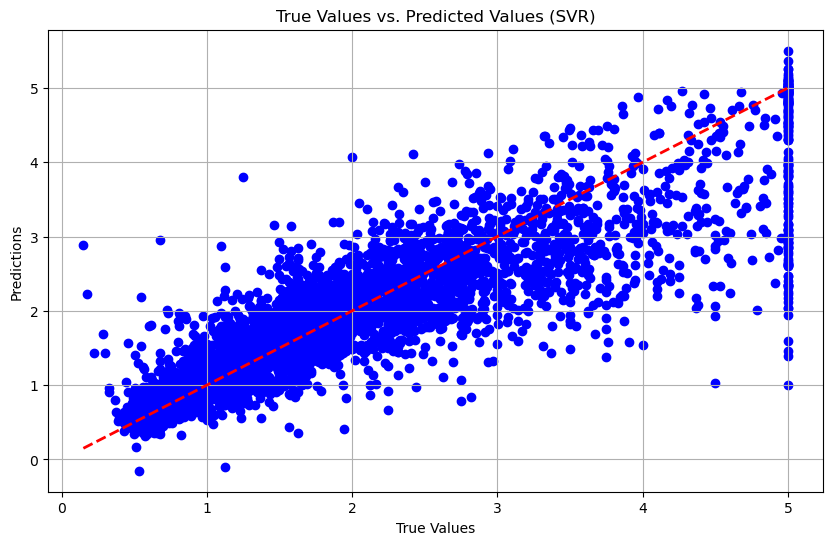

In [12]:
# Passo 6: Predição e Avaliação
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')




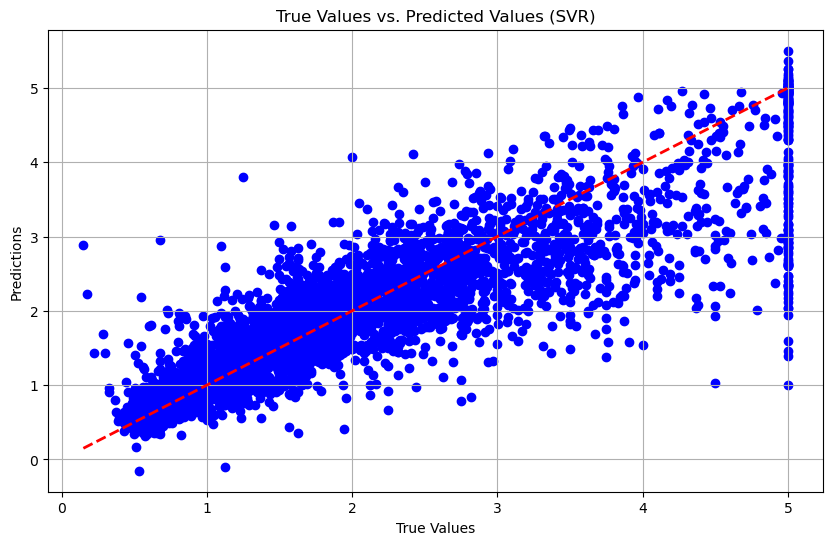

In [13]:
# Passo 7: Visualização dos Resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values (SVR)')
plt.grid(True)
plt.show()